In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

# Regression with the Ames Housing Dataset
a modern, more challenging alternative to the well-known Boston Housing dataset

In [25]:
train_df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
train_df.shape, train_df.columns

((1460, 81),
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
      

The **Ames Housing dataset** comprises of **80 input variables** and **1 target variable**. For a description of each input variable, please see the data_description.txt included in the dataset.

## The target variable: SalePrice
Let's take a look at our target variable, "SalePrice" which is the house selling price in dollars:

In [9]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\Jessa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


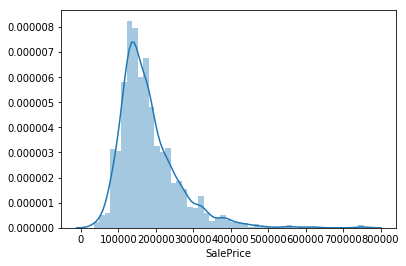

In [11]:
sns.distplot(train_df['SalePrice'])

The histogram above shows that the distribution looks like a normal distribution but one that it's skewed to the right.

Numerically, the distribution's asymmetry can be described by **Skewness** (positive means skewed to the right) and **Kurtosis** (bigger positive means "heavy-tailed"):

In [13]:
print("Skewness: %f" % (train_df['SalePrice'].skew()))
print("Kurtosis: %f" % (train_df['SalePrice'].kurt()))

Skewness: 1.882876
Kurtosis: 6.536282


# Exploring the input variables
In the next section, let's explore the variables with the eventual goal of deciding which variables to use for predicting house pricing.

The input variables can be broadly categorized as **numerical** or **categorical** in value. Let's try to make sense of them in parts:

#### MSSubClass: type of dwelling
This column looks like a numerical variable at first glance, but it is actually number-coded categories.

In [20]:
train_df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

... and so we must treat them as categorical data!

In [21]:
train_df['MSSubClass'] = pd.Categorical(train_df.MSSubClass)

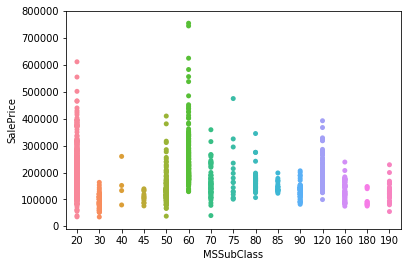

In [28]:
ax = sns.stripplot(x='MSSubClass', y='SalePrice', data=train_df)

Try plotting against SalePrice and LotArea?

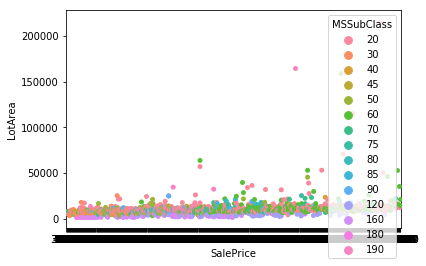

In [29]:
ax = sns.stripplot(x='SalePrice', y='LotArea', hue='MSSubClass', data=train_df)